<a href="https://colab.research.google.com/github/raziehAskarizade/chatbot/blob/main/PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sort Images

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 123076 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-37ubuntu0.1_amd64.deb ...
Unpacking w3m (0.5.3-37ubuntu0.1) ...
Setting up w3m (0.5.3-37ubuntu0.1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [ ]:
import os

In [ ]:
raw_path = '/content/drive/MyDrive/raw'
seg_path = '/content/drive/MyDrive/results'

raw_imgs = [img for img in os.listdir(raw_path)]
seg_imgs = [img for img in os.listdir(seg_path)]

sorted_raw = sorted(raw_imgs)
sorted_seg = sorted(seg_imgs)

In [ ]:
sorted_raw[25:37]

['120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg']

In [ ]:
sorted_seg[25:37]

['120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg']

Image processing

In [ ]:
import cv2 as cv
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)

In [ ]:
def imgp_raw(path, size, the1, the2, the3=127, the4=200):

  image = cv.imread(path)

  image = cv.resize(image,(size,size))

  img_ = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  img_np = np.asarray(img_)

  img_th = cv.threshold(img_np, the1, the2, cv.THRESH_TRUNC)[1]

  dcm_gray = np.zeros([size, size], dtype=np.uint8)
  img_th = np.uint8(cv.normalize(img_th, dcm_gray, the3, the4, cv.NORM_INF))

  equalized = cv.equalizeHist(img_th)

  gblur = cv.GaussianBlur(equalized, (3, 3), 0, 0, cv.BORDER_WRAP)
  median = cv.medianBlur(gblur, 5)

  dst = cv.fastNlMeansDenoising(median, None, 20, 7, 21)

  imagee = dst.astype(np.float32) / 255.0

  imagf = np.expand_dims(imagee, axis=-1)


  return imagf

In [ ]:
def imgp_label(path, size):
  image = cv.imread(path)

  th, im = cv.threshold(image, 250, 255, cv.THRESH_BINARY)
  im = cv.resize(im, (size,size))

  gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

  blur = cv.GaussianBlur(gray,(5,5),0)
  ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

  imagee = th3.astype(np.float32) / 255.0

  mask = np.expand_dims(imagee, axis=-1)

  return mask

remove copy right rectangle

In [ ]:
from PIL import Image

def cropping(path, new_path, end_x, end_y):
    imgs = [img for img in os.listdir(path)]

    start_x = 0
    start_y = 0
    for i in imgs:
        path_ = os.path.join(path, i)
        image = Image.open(path_)

        for x in range(start_x, end_x):
            for y in range(start_y, end_y):
                image.putpixel((x, y), 0)

        image.save(os.path.join(new_path , "{}".format(i)))

In [ ]:
raw_path = "/content/drive/MyDrive/raw"
seg_path = "/content/drive/MyDrive/results"

crop_raw_path = "/content/drive/MyDrive/croped"
crop_seg_path = "/content/drive/MyDrive/croped_seg"

# cropping(raw_path, crop_raw_path, 195, 46)
# cropping(seg_path, crop_seg_path, 113, 18)

In [ ]:
raw_imgs = [img for img in os.listdir(crop_raw_path)]
seg_imgs = [img for img in os.listdir(crop_seg_path)]

sorted_raw = sorted(raw_imgs)
sorted_seg = sorted(seg_imgs)

In [ ]:
sorted_raw[:20]

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg']

In [ ]:
sorted_seg[:20]

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg']

In [ ]:
from sklearn.model_selection import train_test_split

def convert_npy(path_raw, path_seg):

  labeled_filenames = sorted_seg[:30]
  raw_filenames = sorted_raw[:30]

  X_train, X_test, Y_train, Y_test = train_test_split(raw_filenames, labeled_filenames, test_size=0.2, random_state=42)

  Y_train_labeled = np.array([imgp_label(os.path.join(path_seg, filename), 256) for filename in Y_train])
  # X_train_raw = np.array([imgp_raw(os.path.join(path_raw, filename), 256, 160, 255) for filename in X_train])
  # X_train_raw = np.array([imgp_raw(os.path.join(path_raw, filename), 256, 200, 255) for filename in X_train])   #best
  X_train_raw = np.array([imgp_raw(os.path.join(path_raw, filename), 256, 200, 255, 4, 100) for filename in X_train])


  Y_test_labeled = np.array([imgp_label(os.path.join(path_seg, filename), 256) for filename in Y_test])
  # X_test_raw = np.array([imgp_raw(os.path.join(path_raw, filename), 256, 160, 255) for filename in X_test])
  # X_test_raw = np.array([imgp_raw(os.path.join(path_raw, filename), 256, 200, 255) for filename in X_test])
  X_test_raw = np.array([imgp_raw(os.path.join(path_raw, filename), 256, 200, 255, 4, 100) for filename in X_test])


  path = '/content/drive/MyDrive/'
  np.save(path + 'Y_train1.npy', Y_train_labeled)
  np.save(path + 'X_train1.npy', X_train_raw)
  np.save(path + 'Y_test1.npy', Y_test_labeled)
  np.save(path + 'X_test1.npy', X_test_raw)

  return Y_train_labeled, X_train_raw, Y_test_labeled, X_test_raw

In [ ]:
# Y_train_labeled, X_train_raw, Y_test_labeled, X_test_raw = convert_npy(crop_raw_path,crop_seg_path)

FCN model

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate, BatchNormalization, Conv2DTranspose, Concatenate, Cropping2D, ZeroPadding2D
from sklearn.model_selection import ParameterGrid
import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
def fcn(input_size=(None, None, 1)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(pool3)

    # Decoder
    up5 = UpSampling2D(size=(2, 2))(drop4)
    up5 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(up5)
    merge5 = concatenate([conv3, up5], axis=3)
    conv5 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge5)
    conv5 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)

    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(up6)
    merge6 = concatenate([conv2, up6], axis=3)
    conv6 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(up7)
    print(up7.shape)
    merge7 = concatenate([conv1, up7], axis=3)
    conv7 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    # Output
    output = Conv2D(1, 1, activation='sigmoid')(conv7)

    # Model
    model = Model(inputs=inputs, outputs=output)

    return model

In [ ]:
def UNET (input_shape=(256,256,1),last_activation='sigmoid'):
    inputs=Input(shape=input_shape)

    conv1 = Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    d1=Dropout(0.1)(conv1)
    conv2 = Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d1)
    b=BatchNormalization()(conv2)

    pool1 = MaxPooling2D(pool_size=(2, 2))(b)
    conv3 = Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    d2=Dropout(0.2)(conv3)
    conv4 = Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d2)
    b1=BatchNormalization()(conv4)

    pool2 = MaxPooling2D(pool_size=(2, 2))(b1)
    conv5 = Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    d3=Dropout(0.3)(conv5)
    conv6 = Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d3)
    b2=BatchNormalization()(conv6)

    pool3 = MaxPooling2D(pool_size=(2, 2))(b2)
    conv7 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    d4=Dropout(0.4)(conv7)
    conv8 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d4)
    b3=BatchNormalization()(conv8)

    pool4 = MaxPooling2D(pool_size=(2, 2))(b3)
    conv9 = Conv2D(512,(3,3),activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    d5=Dropout(0.5)(conv9)
    conv10 = Conv2D(512,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d5)
    b4=BatchNormalization()(conv10)


    conv11 = Conv2DTranspose(512,(4,4), activation = 'relu', padding = 'same', strides=(2,2),kernel_initializer = 'he_normal')(b4)
    x= concatenate([conv11,conv8])
    conv12 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x)
    d6=Dropout(0.4)(conv12)
    conv13 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d6)
    b5=BatchNormalization()(conv13)


    conv14 = Conv2DTranspose(256,(4,4), activation = 'relu', padding = 'same', strides=(2,2),kernel_initializer = 'he_normal')(b5)
    x1=concatenate([conv14,conv6])
    conv15 = Conv2D(128,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x1)
    d7=Dropout(0.3)(conv15)
    conv16 = Conv2D(128,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d7)
    b6=BatchNormalization()(conv16)

    conv17 = Conv2DTranspose(128,(4,4), activation = 'relu', padding = 'same',strides=(2,2), kernel_initializer = 'he_normal')(b6)
    x2=concatenate([conv17,conv4])
    conv18 = Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x2)
    d8=Dropout(0.2)(conv18)
    conv19 = Conv2D(64,(3,3) ,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d8)
    b7=BatchNormalization()(conv19)

    conv20 = Conv2DTranspose(64,(4,4), activation = 'relu', padding = 'same',strides=(2,2), kernel_initializer = 'he_normal')(b7)
    x3=concatenate([conv20,conv2])
    conv21 = Conv2D(32,(3,3) ,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x3)
    d9=Dropout(0.1)(conv21)
    conv22 = Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d9)

    outputs = Conv2D(1,(1,1), activation = last_activation, padding = 'same', kernel_initializer = 'he_normal')(conv22)
    model2 = Model( inputs = inputs, outputs = outputs)

    return model2

Train

In [ ]:
import keras
import pandas as pd

def train_model(model, X_train, Y_train, X_test, Y_test, param_grid):

    model = model
    metrics = ['accuracy']
    model.compile(optimizer=keras.optimizers.Adam(lr=param_grid['lr']), loss='binary_crossentropy', metrics= metrics)

    compiled_model = model.save('/content/drive/MyDrive/compiled/')

    callback = keras.callbacks.EarlyStopping(patience=4, start_from_epoch=5)

    fitness = model.fit(X_train, Y_train, batch_size=param_grid['batch_size'], epochs=param_grid['epochs'], verbose=1, validation_data=(X_test, Y_test), callbacks=[callback])
    trained_model = model.save('/content/drive/MyDrive/trained/')

    results = model.evaluate(X_test, Y_test)

    return fitness

evaluate

In [ ]:
def evaluate_model(X_test, Y_test, threshold=0.5):

  model = keras.models.load_model('/content/drive/MyDrive/trained/')

  Y_pred = model.predict(X_test)
  Y_pred2 = Y_pred

  Y_pred = (Y_pred > threshold).astype(int)
  Y_test = np.where(Y_test > threshold, 1, 0)

  Y_test_flat = Y_test.ravel()
  Y_pred_flat = Y_pred.ravel()

  pa = np.sum(Y_test_flat == Y_pred_flat) / len(Y_test_flat)

  cm = confusion_matrix(Y_test_flat, Y_pred_flat)

  iou = np.diag(cm) / (np.sum(cm, axis=1) + np.sum(cm, axis=0) - np.diag(cm))
  miou = np.mean(iou)

  precision = precision_score(Y_test_flat, Y_pred_flat, average='weighted', zero_division=0)
  recall = recall_score(Y_test_flat, Y_pred_flat, average='weighted', zero_division=0)
  f1 = f1_score(Y_test_flat, Y_pred_flat, average='weighted', zero_division=0)

  accuracy = accuracy_score(Y_test_flat, Y_pred_flat)


  return {'accuracy': round(accuracy,2), 'precision': round(precision,2), 'recall': round(recall,2),
          'f1': round(f1,2), 'Pixel_Accuracy' : round(pa,2), 'mIoU' : round(miou,2)}, X_test, Y_pred2, Y_test

       
            
                
                               
                               

UNET model using (256,256) size

fcn model using (256,256) size

(None, 256, 256, 128)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
2/2 [==============================] - 6s 2s/step - loss: 0.3078 - accuracy: 0.9619 - val_loss: 0.2916 - val_accuracy: 0.9617
Epoch 2/50
2/2 [==============================] - 5s 2s/step - loss: 0.3267 - accuracy: 0.9626 - val_loss: 0.2198 - val_accuracy: 0.9617
Epoch 3/50
2/2 [==============================] - 5s 2s/step - loss: 0.2198 - accuracy: 0.9626 - val_loss: 0.2073 - val_accuracy: 0.9617
Epoch 4/50
2/2 [==============================] - 5s 2s/step - loss: 0.2139 - accuracy: 0.9626 - val_loss: 0.2007 - val_accuracy: 0.9617
Epoch 5/50
2/2 [==============================] - 4s 2s/step - loss: 0.1990 - accuracy: 0.9626 - val_loss: 0.1939 - val_accuracy: 0.9617
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 0.2053 - accuracy: 0.9626 - val_loss: 0.1986 - val_accuracy: 0.9617
Epoch 7/50
2/2 [==============================] - 4s 2s/step - loss: 0.1928 - accuracy: 0.9626 - val_loss: 0.1881 - val_accuracy: 0.9617
Epoch 8/50
2/2 [=========================

1/1 [==============================] - 0s 174ms/step
{'accuracy': 0.96, 'precision': 0.92, 'recall': 0.96, 'f1': 0.94, 'Pixel_Accuracy': 0.96, 'mIoU': 0.48}


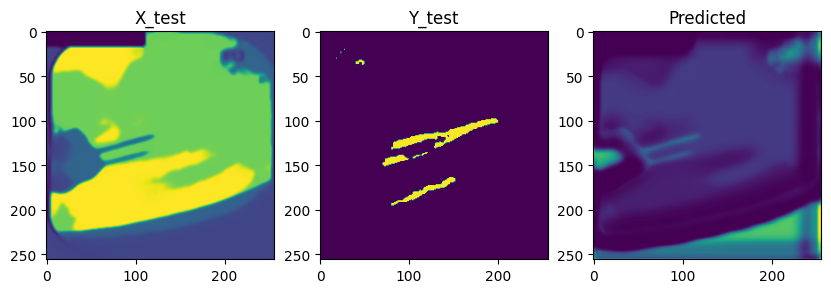

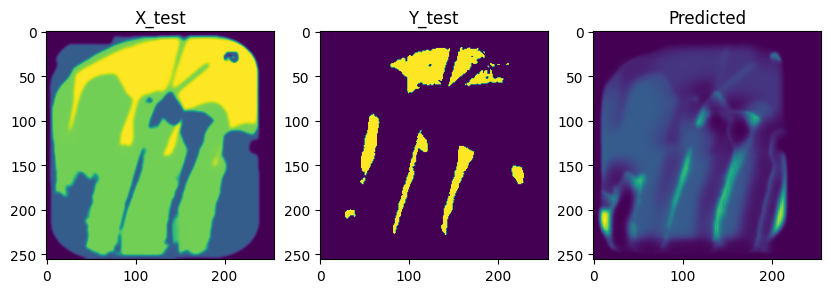

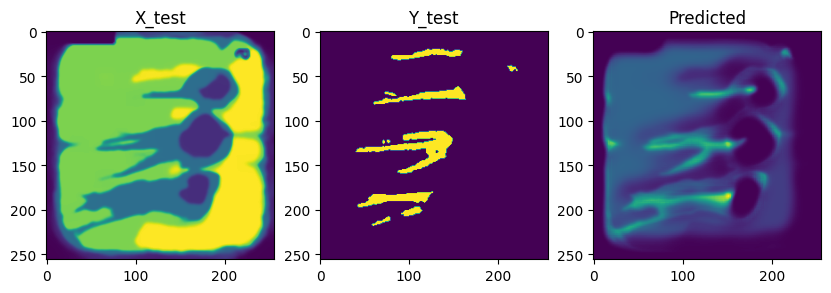

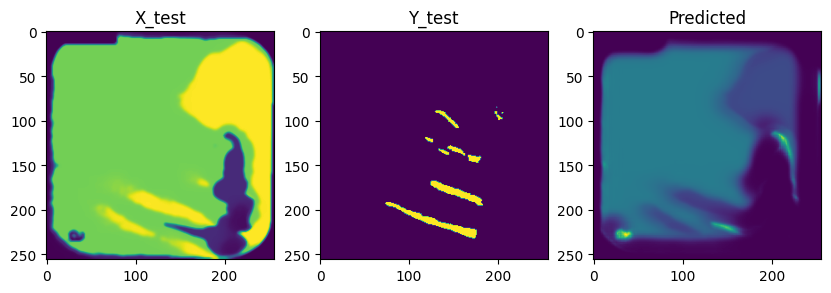

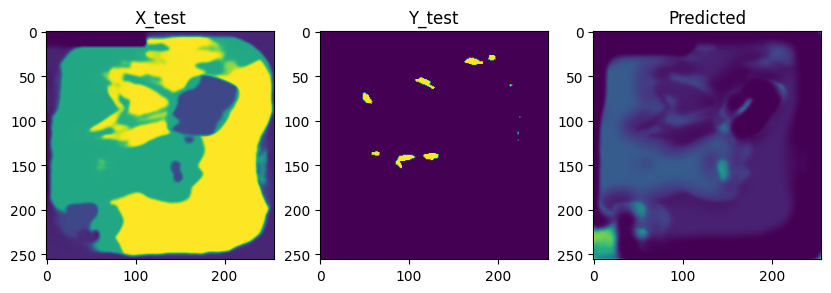

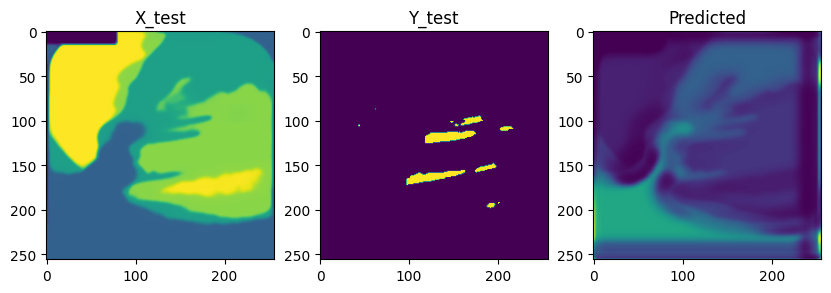

In [ ]:
path = '/content/drive/MyDrive/'
X_train = np.load(path + 'X_train30.npy')
Y_train = np.load(path + 'Y_train30.npy')
X_test = np.load(path + 'X_test30.npy')
Y_test = np.load(path + 'Y_test30.npy')

param_grid = {
    'lr': 1e-4,
    'batch_size': 16,
    'epochs': 50 }

model = fcn((256, 256, 1))
train_model(model, X_train, Y_train, X_test, Y_test, param_grid)

metrics , X_test2, Y_pred2, Y_test2 = evaluate_model(X_test, Y_test)

print(metrics)

x = np.arange(X_test2[0].ravel().size)
for i in range(6):

  fig, axs = plt.subplots(1, 3, figsize=(10, 3))

  axs[0].imshow(X_test2[i].squeeze())
  axs[0].set_title('X_test')

  axs[1].imshow(Y_test2[i].squeeze())
  axs[1].set_title('Y_test')

  axs[2].imshow(Y_pred2[i].squeeze())
  axs[2].set_title('Predicted')

  plt.savefig(os.path.join('/content/drive/MyDrive/plots', "plot_fcn{}.png".format(i)))

In [ ]:
for i in range(6):
  seg_image = Y_pred2[i] * 255

  cv.imwrite("predict{}.jpg".format(i), seg_image)

In [ ]:
for i in range(6):
  seg_image = X_test2[i] * 255

  cv.imwrite("test{}.jpg".format(i), seg_image)

In [ ]:
import importlib.util


file_path = '/content/drive/MyDrive/CCA_Analysis.py'

spec = importlib.util.spec_from_file_location('CCA_Analysis', file_path)
my_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(my_module)

for i in range(6):
    img = cv.imread("/content/test{}.jpg".format(i))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = np.expand_dims(img, axis=-1)

    predict = cv.imread("/content/predict{}.jpg".format(i))
    predict = cv.cvtColor(predict, cv.COLOR_BGR2GRAY)
    predict = np.expand_dims(predict, axis=-1)

    predict1 = predict

    mask=np.uint8(predict1*255)
    _, mask = cv.threshold(mask, thresh=240, maxval=255, type=cv.THRESH_BINARY)
    cnts,hieararch=cv.findContours(mask,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    img = cv.drawContours(img[:,:,0], cnts, -1, (255, 0, 0) , 2)
    img = cv.UMat(img)

    cv.imwrite('{}.png'.format(i),img)

match segment and img of teeth

In [ ]:
path = '/content/drive/MyDrive/'
X_train = np.load(path + 'X_train30.npy')
Y_train = np.load(path + 'Y_train30.npy')
X_test = np.load(path + 'X_test30.npy')
Y_test = np.load(path + 'Y_test30.npy')

In [ ]:
metrics , X_test2, Y_pred2, Y_test2 = evaluate_model(X_test, Y_test, 0.50)

print(metrics)

1/1 [==============================] - 16s 16s/step
{'accuracy': 0.96, 'precision': 0.95, 'recall': 0.96, 'f1': 0.95, 'Pixel_Accuracy': 0.96, 'mIoU': 0.55}


In [ ]:
len(Y_pred2)

6

In [ ]:
for i in range(len(Y_pred2)):
  image = Y_pred2[i] * 255

  cv.imwrite("/content/drive/MyDrive/predict/predict{}.jpg".format(i), image)

In [ ]:
for i in range(len(Y_pred2)):
  image = X_test2[i] * 255

  cv.imwrite("/content/drive/MyDrive/test/test{}.jpg".format(i), image)

In [ ]:
for i in range(len(Y_pred2)):
  image = Y_test2[i] * 255

  cv.imwrite("/content/drive/MyDrive/segment/segment{}.jpg".format(i), image)

In [ ]:
list_of_values = []

In [ ]:
# plt.imshow(img, 'gray')
# plt.title("{}".format(img.shape))
# plt.xticks([]), plt.yticks([])
# plt.show()
def find_pix(path):
  img = cv.imread(path)
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          output = img[i,j] >= [30,30,30]
          if output[0] or output[1] or output[2]:
              list_of_values.append([i,j])

In [ ]:
from PIL import Image

def replace_pix(path):
  img = Image.open(path)
  # print(img.mode)
  # print(img.size)

  img = img.convert('RGB')
  for i in range(len(list_of_values)):
      x , y  = list_of_values[i]
      img.putpixel((y, x), 255)

  # img.show()
  return img

In [ ]:
for i in range(len(Y_pred2)):
  list_of_values = []
  find_pix("/content/drive/MyDrive/predict/predict{}.jpg".format(i))
  img = replace_pix("/content/drive/MyDrive/test/test{}.jpg".format(i))
  img.save("/content/drive/MyDrive/seg_img/seg{}.jpg".format(i))

In [ ]:
# plt.imshow(Y_pred2[7], 'gray')
# plt.title("{}".format(Y_pred2[0].shape))
# plt.xticks([]), plt.yticks([])
# plt.show()

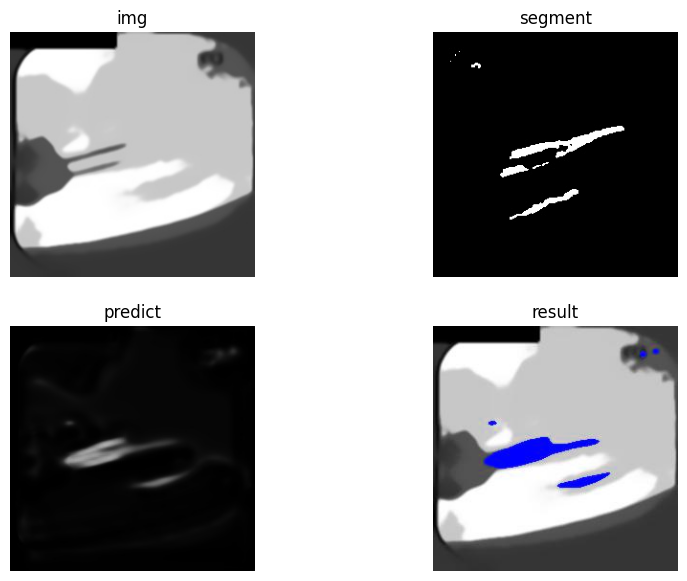

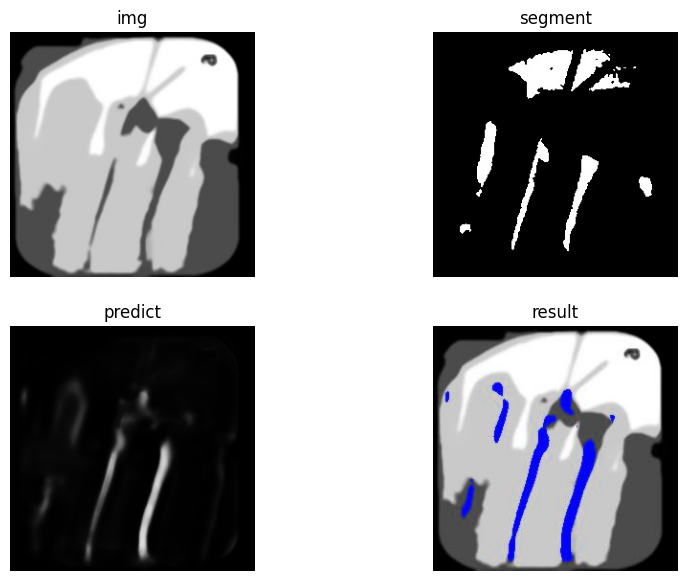

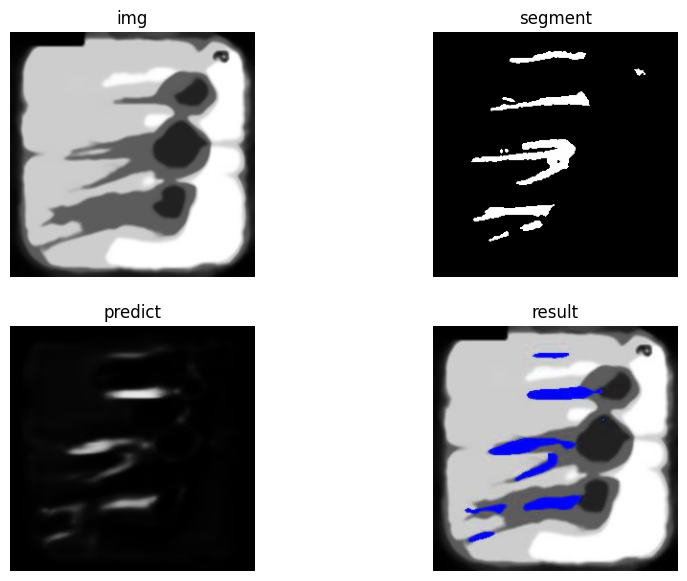

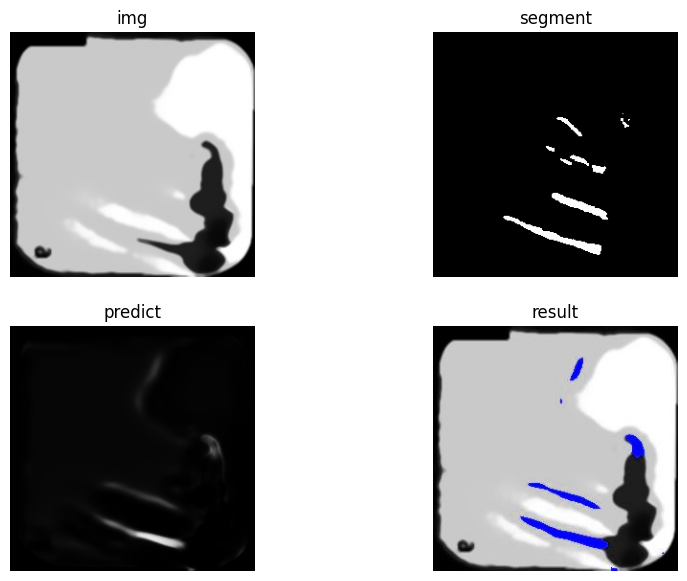

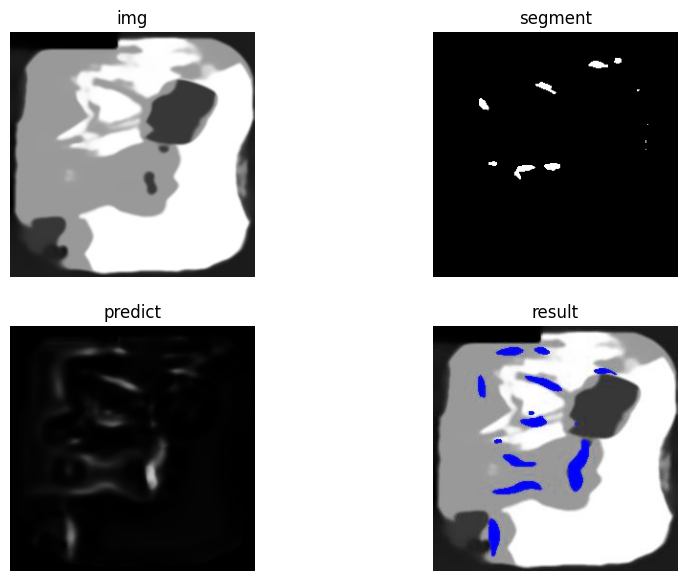

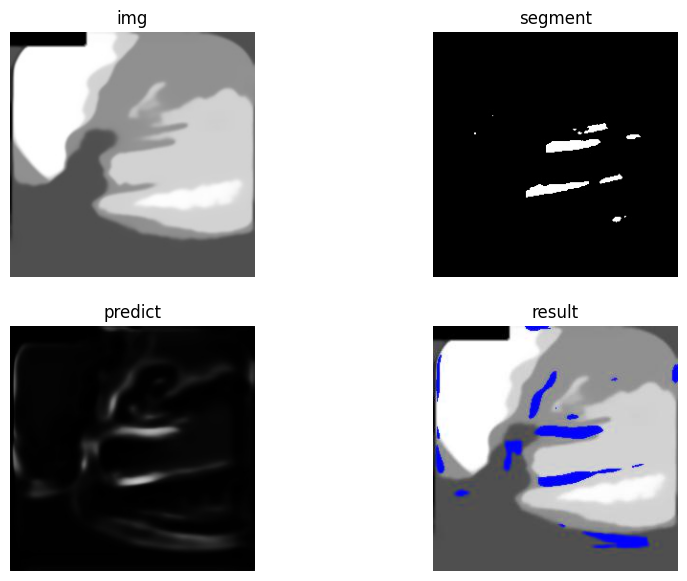

In [ ]:
for i in range(len(Y_pred2)):
  Image1 = cv.imread("/content/drive/MyDrive/test/test{}.jpg".format(i))
  Image2 = cv.imread("/content/drive/MyDrive/segment/segment{}.jpg".format(i))
  Image3 = cv.imread("/content/drive/MyDrive/predict/predict{}.jpg".format(i))
  Image4 = cv.imread("/content/drive/MyDrive/seg_img/seg{}.jpg".format(i))

  fig = plt.figure(figsize=(10, 7))

  rows = 2
  columns = 2

  fig.add_subplot(rows, columns, 1)

  plt.imshow(Image1)
  plt.axis('off')
  plt.title("img")

  fig.add_subplot(rows, columns, 2)

  plt.imshow(Image2)
  plt.axis('off')
  plt.title("segment")

  fig.add_subplot(rows, columns, 3)

  plt.imshow(Image3)
  plt.axis('off')
  plt.title("predict")

  fig.add_subplot(rows, columns, 4)

  plt.imshow(Image4)
  plt.axis('off')
  plt.title("result")

  # plt.savefig("/content/drive/MyDrive/plots/result{}.jpg".format(i))

  # plt.close()


In [ ]:
sorted_seg[-50:]

['954.jpg',
 '955.jpg',
 '956.jpg',
 '957.jpg',
 '958.jpg',
 '959.jpg',
 '96.jpg',
 '960.jpg',
 '961.jpg',
 '962.jpg',
 '963.jpg',
 '964.jpg',
 '965.jpg',
 '966.jpg',
 '967.jpg',
 '968.jpg',
 '969.jpg',
 '97.jpg',
 '970.jpg',
 '971.jpg',
 '972.jpg',
 '973.jpg',
 '974.jpg',
 '975.jpg',
 '976.jpg',
 '977.jpg',
 '978.jpg',
 '979.jpg',
 '98.jpg',
 '980.jpg',
 '981.jpg',
 '982.jpg',
 '983.jpg',
 '984.jpg',
 '985.jpg',
 '986.jpg',
 '987.jpg',
 '988.jpg',
 '989.jpg',
 '99.jpg',
 '990.jpg',
 '991.jpg',
 '992.jpg',
 '993.jpg',
 '994.jpg',
 '995.jpg',
 '996.jpg',
 '997.jpg',
 '998.jpg',
 '999.jpg']

(None, 256, 256, 128)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
50/50 [==============================] - 202s 3s/step - loss: 0.1850 - accuracy: 0.9543 - val_loss: 0.1383 - val_accuracy: 0.9747
Epoch 2/20
50/50 [==============================] - 135s 3s/step - loss: 0.1373 - accuracy: 0.9729 - val_loss: 0.1155 - val_accuracy: 0.9747
Epoch 3/20
50/50 [==============================] - 135s 3s/step - loss: 0.1310 - accuracy: 0.9729 - val_loss: 0.1283 - val_accuracy: 0.9747
Epoch 4/20
50/50 [==============================] - 133s 3s/step - loss: 0.1226 - accuracy: 0.9729 - val_loss: 0.1043 - val_accuracy: 0.9747
Epoch 5/20
50/50 [==============================] - 135s 3s/step - loss: 0.1098 - accuracy: 0.9729 - val_loss: 0.0983 - val_accuracy: 0.9747
Epoch 6/20
50/50 [==============================] - 133s 3s/step - loss: 0.1078 - accuracy: 0.9729 - val_loss: 0.1017 - val_accuracy: 0.9747
Epoch 7/20
50/50 [==============================] - 135s 3s/step - loss: 0.1038 - accuracy: 0.9730 - val_loss: 0.0935 - val_accuracy: 0.9748
Epoch 8/20
50

7/7 [==============================] - 8s 1s/step
{'accuracy': 0.98, 'precision': 0.97, 'recall': 0.98, 'f1': 0.97, 'Pixel_Accuracy': 0.98, 'mIoU': 0.6}


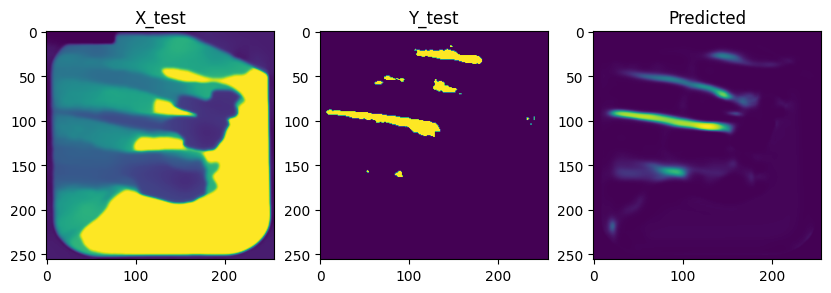

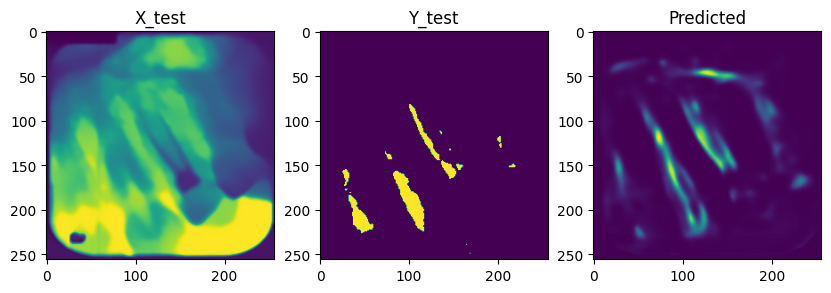

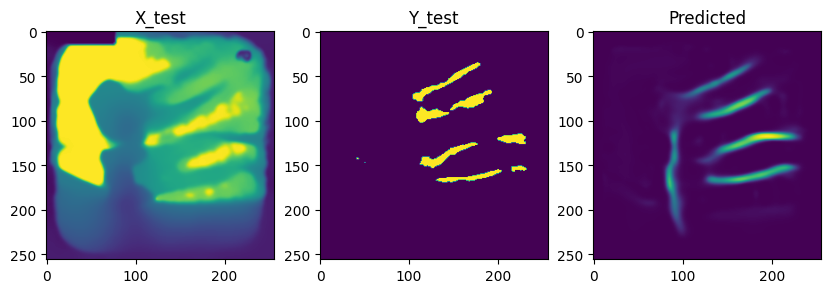

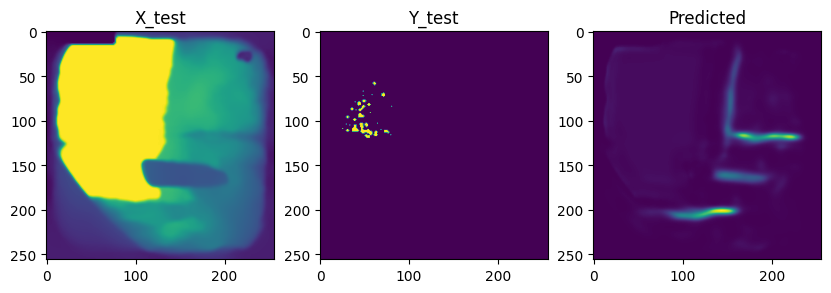

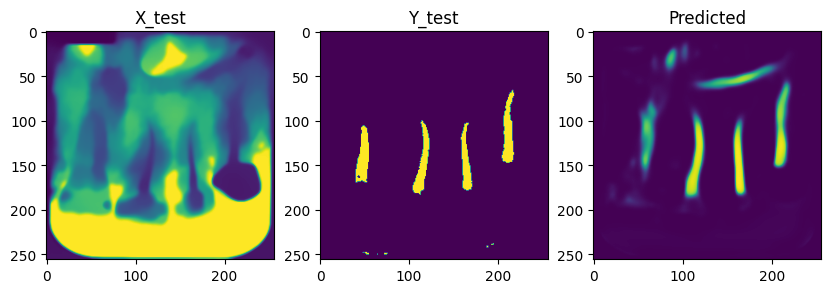

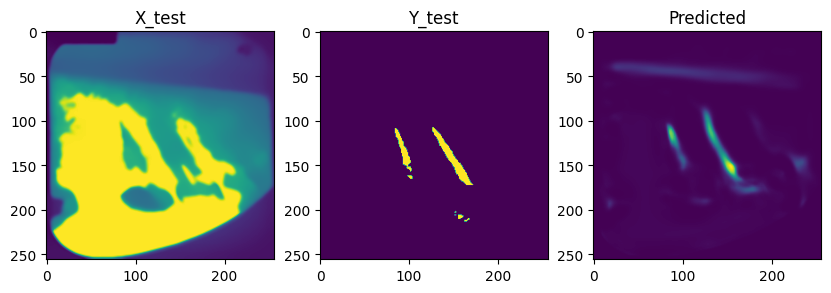

In [ ]:
path = '/content/drive/MyDrive/'
X_train1 = np.load(path + 'X_train1.npy')
Y_train1 = np.load(path + 'Y_train1.npy')
X_test1 = np.load(path + 'X_test1.npy')
Y_test1 = np.load(path + 'Y_test1.npy')

param_grid = {
    'lr': 1e-4,
    'batch_size': 16,
    'epochs': 20 }

model = fcn((256, 256, 1))
train_model(model, X_train1, Y_train1, X_test1, Y_test1, param_grid)

metrics1 , X_test21, Y_pred21, Y_test21 = evaluate_model(X_test1, Y_test1)

print(metrics1)

x = np.arange(X_test21[0].ravel().size)
for i in range(6):

  fig, axs = plt.subplots(1, 3, figsize=(10, 3))

  axs[0].imshow(X_test21[i].squeeze())
  axs[0].set_title('X_test')

  axs[1].imshow(Y_test21[i].squeeze())
  axs[1].set_title('Y_test')

  axs[2].imshow(Y_pred21[i].squeeze())
  axs[2].set_title('Predicted')

  plt.savefig(os.path.join('/content/drive/MyDrive/plots', "plot_fcn{}.png".format(i)))

In [ ]:
path = '/content/drive/MyDrive/'
X_train1 = np.load(path + 'X_train1.npy')
Y_train1 = np.load(path + 'Y_train1.npy')
X_test1 = np.load(path + 'X_test1.npy')
Y_test1 = np.load(path + 'Y_test1.npy')

In [ ]:
metrics1 , X_test21, Y_pred21, Y_test21 = evaluate_model(X_test1, Y_test1, 0.50)

print(metrics1)

7/7 [==============================] - 53s 3s/step
{'accuracy': 0.98, 'precision': 0.97, 'recall': 0.98, 'f1': 0.97, 'Pixel_Accuracy': 0.98, 'mIoU': 0.6}


In [ ]:
len(Y_pred21)

200

In [ ]:
for i in range(len(Y_pred21)):
  image = Y_pred21[i] * 255

  cv.imwrite("/content/drive/MyDrive/predict/predict{}.jpg".format(i), image)

In [ ]:
for i in range(len(Y_pred21)):
  image = X_test21[i] * 255

  cv.imwrite("/content/drive/MyDrive/test/test{}.jpg".format(i), image)

In [ ]:
for i in range(len(Y_pred21)):
  image = Y_test21[i] * 255

  cv.imwrite("/content/drive/MyDrive/segment/segment{}.jpg".format(i), image)

In [ ]:
list_of_values1 = []

In [ ]:
def find_pix(path):
  img = cv.imread(path)
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          output = img[i,j] >= [30,30,30]
          if output[0] or output[1] or output[2]:
              list_of_values1.append([i,j])

In [ ]:
from PIL import Image

def replace_pix(path):
  img = Image.open(path)

  img = img.convert('RGB')
  for i in range(len(list_of_values1)):
      x , y  = list_of_values1[i]
      img.putpixel((y, x), 255)

  return img

In [ ]:
for i in range(len(Y_pred21)):
  list_of_values1 = []
  find_pix("/content/drive/MyDrive/predict/predict{}.jpg".format(i))
  img = replace_pix("/content/drive/MyDrive/test/test{}.jpg".format(i))
  img.save("/content/drive/MyDrive/seg_img/seg{}.jpg".format(i))

In [ ]:
for i in range(len(Y_pred21)):
  Image1 = cv.imread("/content/drive/MyDrive/test/test{}.jpg".format(i))
  Image2 = cv.imread("/content/drive/MyDrive/segment/segment{}.jpg".format(i))
  Image3 = cv.imread("/content/drive/MyDrive/predict/predict{}.jpg".format(i))
  Image4 = cv.imread("/content/drive/MyDrive/seg_img/seg{}.jpg".format(i))

  fig = plt.figure(figsize=(6, 7))

  rows = 2
  columns = 2

  fig.add_subplot(rows, columns, 1)

  plt.imshow(Image1)
  plt.axis('off')
  plt.title("img")

  fig.add_subplot(rows, columns, 2)

  plt.imshow(Image2)
  plt.axis('off')
  plt.title("segment")

  fig.add_subplot(rows, columns, 3)

  plt.imshow(Image3)
  plt.axis('off')
  plt.title("predict")

  fig.add_subplot(rows, columns, 4)

  plt.imshow(Image4)
  plt.axis('off')
  plt.title("result")

  plt.savefig("/content/drive/MyDrive/plots/result{}.jpg".format(i))

  plt.close()

